<a href="https://colab.research.google.com/github/GabrielMalinowski/ML_Self-Learning/blob/master/AASA_task_Gabriel_Malinowski.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Task 1: 
 Below is the chart comparing actual and expected probability of default (PD) rates by score group. Expected PD represents probability of default over full life of the loan (i.e. until its contracted maturity).<br>
Please analyze the chart, draw conclusions, and offer recommendations. If some information is missing that would help you analyze it better, please list them and explain why they are important.<br>
![](https://drive.google.com/uc?export=view&id=1BgSvoM-A0crt6nGFvDLQqhWYWTAOs_vl)

In [0]:
import pandas as pd

In [2]:
# based on the chart above
df1 = pd.DataFrame({
    'Issued_volume':[15000,20000,55000,70000,110000,153000,200000,170000,165000,125000],
    'Expected_PD':[0.657,0.533,0.480,0.420,0.385,0.330,0.270,0.200,0.150,0.098],
    'Actual_PD':[0.752,0.570,0.470,0.430,0.350,0.302,0.235,0.214,0.153,0.095]
})

df1

,Issued_volume,Expected_PD,Actual_PD
0,15000,0.657,0.752
1,20000,0.533,0.570
2,55000,0.480,0.470
3,70000,0.420,0.430
4,110000,0.385,0.350
5,153000,0.330,0.302
6,200000,0.270,0.235
7,170000,0.200,0.214
8,165000,0.150,0.153
9,125000,0.098,0.095


In [3]:
total_volume = df1.Issued_volume.sum()
total_exp_pd = round(df1.Issued_volume.dot(df1.Expected_PD)/total_volume,4)
total_real_pd = round(df1.Issued_volume.dot(df1.Actual_PD)/total_volume,4)

print(' The total volume is ', total_volume, '\n',
      'The total expected PD is ', total_exp_pd, '\n',
      'The total real PD is ', total_real_pd
     )

 The total volume is  1083000 
 The total expected PD is  0.2716 
 The total real PD is  0.2621


In [4]:
# as we can see based on the output above the total real PD is below expected
# this means we have surplus of capital and below code calculates it

df1['Expected_cost'] = df1.Issued_volume*df1.Expected_PD
df1['Actual_cost']   = df1.Issued_volume*df1.Actual_PD
print(df1['Expected_cost'].sum()-df1['Actual_cost'].sum())

# below amount can be added to the budget for future loans

10319.0


##Task 2:
Below is the table comparing actual and expected probability of default (PD) rates at different months since loans were issued (e.g. 4 mob means that in May 2018 (4 months since January issue). Default is identified when loan is more than 90 days overdue.<br>
How would you better visualize the data in the table? What kind of conclusions can you draw and what recommendations you would offer. If some information is missing that would help you analyze it better, please list them and explain why they are important.<br>
![](https://drive.google.com/uc?export=view&id=1ahH5vVYP4A8DVjc8nwPSdHwqZk7pmXLI)


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# based on the table above
df2 = pd.DataFrame({
    'Month_of_issue':['2018-01','2018-02','2018-03','2018-04','2018-05','2018-06'],
    'Issued_loans_number':[10000,9000,12000,13000,14000,14500],
    'Issued_loans_PLN':[40000,30000,50000,55000,62000,60000],
    'Expected_PD_12mob':[0.27,0.27,0.30,0.29,0.29,0.29],
    '04mob':[0.08,0.09,0.10,0.09,0.09,0.09],
    '05mob':[0.12,0.15,0.16,0.14,0.14,0.14],
    '06mob':[0.16,0.19,0.20,0.18,0.18,0.18],
    '07mob':[0.19,0.21,0.23,0.22,0.21,0.21],
    '08mob':[0.23,0.24,0.26,0.25,0.24,0.24],
    '09mob':[0.25,0.27,0.29,0.27,0.26,0.27],
    '10mob':[0.27,0.28,0.30,0.29,0.29,None],
    '11mob':[0.29,0.30,0.32,0.31,None,None],
    '12mob':[0.31,0.31,0.33,None,None,None]
})

df2 = pd.melt(
    df2,
    id_vars=['Month_of_issue'],
    value_vars=['Issued_loans_number','Issued_loans_PLN','Expected_PD_12mob',
     '04mob','05mob','06mob','07mob','08mob','09mob','10mob','11mob','12mob']
)

df2 = df2.pivot(
    index='variable',
    columns='Month_of_issue',
    values='value'
).reset_index()

df2_trunc = df2.loc[
    (df2['variable']!='Issued_loans_number')&
    (df2['variable']!='Issued_loans_PLN')&
    (df2['variable']!='Expected_PD_12mob')]

df2_exp = df2[df2.variable == 'Expected_PD_12mob']

df2

Month_of_issue,variable,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06
0,04mob,0.08,0.09,0.10,0.09,0.09,0.09
1,05mob,0.12,0.15,0.16,0.14,0.14,0.14
2,06mob,0.16,0.19,0.20,0.18,0.18,0.18
3,07mob,0.19,0.21,0.23,0.22,0.21,0.21
4,08mob,0.23,0.24,0.26,0.25,0.24,0.24
5,09mob,0.25,0.27,0.29,0.27,0.26,0.27
6,10mob,0.27,0.28,0.30,0.29,0.29,NaN
7,11mob,0.29,0.30,0.32,0.31,NaN,NaN
8,12mob,0.31,0.31,0.33,NaN,NaN,NaN
9,Expected_PD_12mob,0.27,0.27,0.30,0.29,0.29,0.29


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


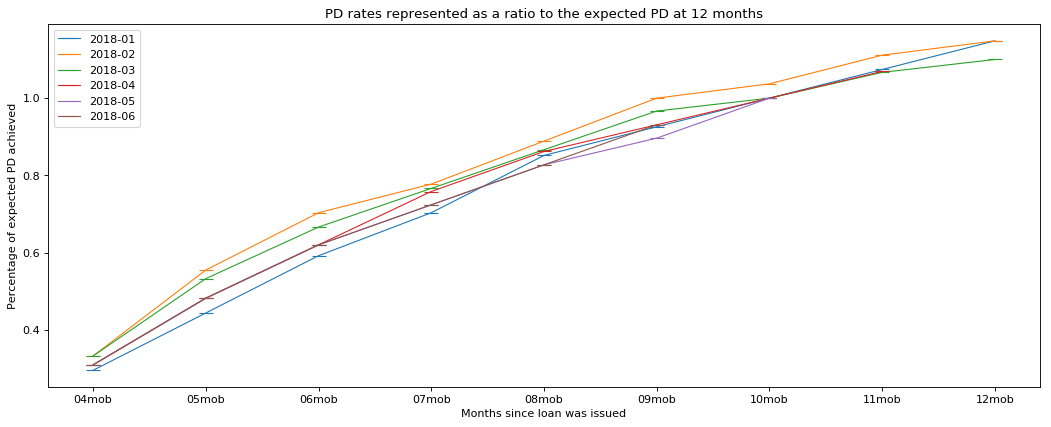

In [7]:
def lines(column):
  df2_trunc[column] = df2_trunc[column]/float(df2_exp[column])
  plt.plot('variable', column, data=df2_trunc, marker='_', markersize=12, linewidth=1)

plt.figure(figsize=(16, 6), dpi= 80, facecolor='w', edgecolor='k')

lines('2018-01')
lines('2018-02')
lines('2018-03')
lines('2018-04')
lines('2018-05')
lines('2018-06')

plt.xlabel('Months since loan was issued')
plt.ylabel('Percentage of expected PD achieved')
plt.title('PD rates represented as a ratio to the expected PD at 12 months')

plt.legend()

In [8]:
df3 = df2.transpose().reset_index()
df3 = df3[df3.Month_of_issue != 'variable']

df3['Issued_loans_PLN'] = df3[10]
df3['Issued_loans_number'] = df3[11]
df3['Average_loan'] = df3[10]/df3[11]*1000

df3 = df3.drop(columns=[0,1,2,3,4,5,6,7,8,9,10,11])

df3

,Month_of_issue,Issued_loans_PLN,Issued_loans_number,Average_loan
1,2018-01,40000,10000,4000
2,2018-02,30000,9000,3333.33
3,2018-03,50000,12000,4166.67
4,2018-04,55000,13000,4230.77
5,2018-05,62000,14000,4428.57
6,2018-06,60000,14500,4137.93


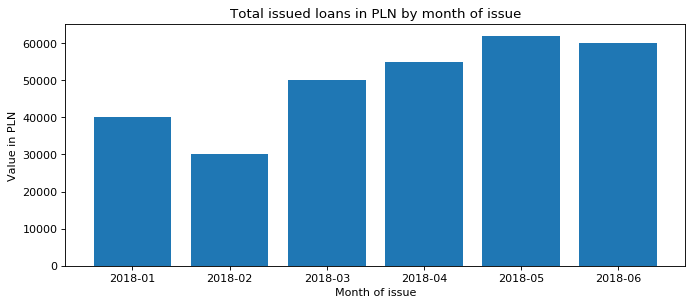

In [9]:
plt.figure(figsize=(10, 4), dpi= 80, facecolor='w', edgecolor='k')
plt.bar(df3.Month_of_issue, df3.Issued_loans_PLN)

plt.xlabel('Month of issue')
plt.ylabel('Value in PLN')
plt.title('Total issued loans in PLN by month of issue')

plt.show()

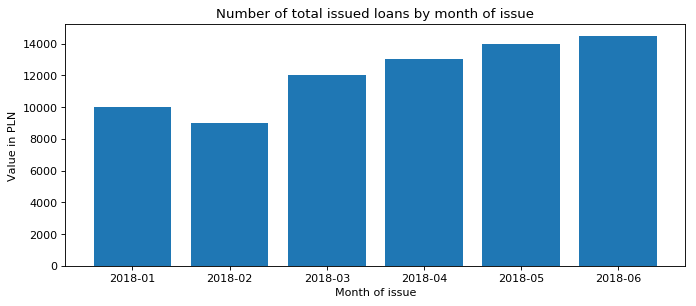

In [10]:
plt.figure(figsize=(10, 4), dpi= 80, facecolor='w', edgecolor='k')
plt.bar(df3.Month_of_issue, df3.Issued_loans_number)

plt.xlabel('Month of issue')
plt.ylabel('Value in PLN')
plt.title('Number of total issued loans by month of issue')

plt.show()

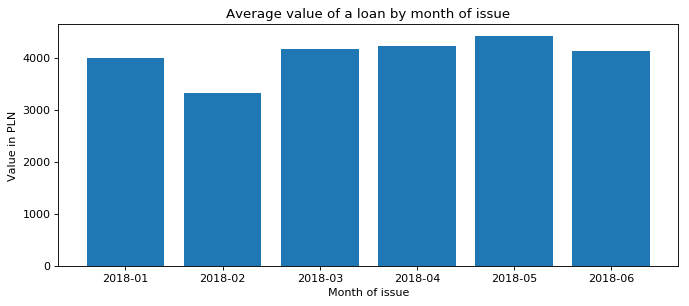

In [11]:
# average value of a loan
plt.figure(figsize=(10, 4), dpi= 80, facecolor='w', edgecolor='k')
plt.bar(df3.Month_of_issue, df3.Average_loan)

plt.xlabel('Month of issue')
plt.ylabel('Value in PLN')
plt.title('Average value of a loan by month of issue')

plt.show()

##Conclusion
As we can see unfortunately we're getting worse PD ratios than expected. This means that we should reduce budget for future loans as we will receive less money back and we should conduct a deeper analysis on which groups of customers are responsible for less than perfect result.